In [16]:
import psycopg2
import psycopg2.extras
# https://ftp.ebi.ac.uk/pub/databases/chembl/ChEMBLdb/latest/schema_documentation.html
# key value table

def getsmiles(compound_name):
    with psycopg2.connect(dbname="chembl_29", user="user", password="user", host="192.168.54.19") as conn:
        with conn.cursor(cursor_factory=psycopg2.extras.DictCursor) as cursor:
            cursor.execute("select molregno, canonical_smiles from compound_structures;")
            Molrengno = cursor.fetchall()
            with open("molregno_smis.csv","w") as smis:
                for item in Molrengno:
                    smis.write(f"{item[0]:>8} {item[1]}")
        return Molrengno

In [88]:
with psycopg2.connect(dbname="chembl_29", user="user", password="user", host="192.168.54.19") as conn:
    with conn.cursor(cursor_factory=psycopg2.extras.DictCursor) as cursor:
        cursor.execute("select distinct target_type from target_dictionary")
        print(cursor.fetchall())
        cursor.execute("select count(*) from compound_structures")
        print(cursor.fetchall())
        cursor.execute("""
          SELECT t.chembl_id AS target_chembl_id,
          t.pref_name        AS target_name,
          t.target_type,
          c.accession        AS protein_accession
          FROM target_dictionary t
          JOIN target_type tt ON t.target_type = tt.target_type
          JOIN target_components tc ON t.tid = tc.tid
          JOIN component_sequences c ON tc.component_id = c.component_id
          AND tt.parent_type  = 'PROTEIN' limit 4;
        """)
        print(cursor.fetchall())


[['PROTEIN NUCLEIC-ACID COMPLEX'], ['SELECTIVITY GROUP'], ['LIPID'], ['ADMET'], ['ORGANISM'], ['NO TARGET'], ['OLIGOSACCHARIDE'], ['NUCLEIC-ACID'], ['CELL-LINE'], ['SMALL MOLECULE'], ['TISSUE'], ['UNCHECKED'], ['PROTEIN FAMILY'], ['NON-MOLECULAR'], ['CHIMERIC PROTEIN'], ['PROTEIN COMPLEX'], ['PHENOTYPE'], ['SINGLE PROTEIN'], ['UNKNOWN'], ['PROTEIN-PROTEIN INTERACTION'], ['SUBCELLULAR'], ['MACROMOLECULE'], ['METAL'], ['PROTEIN COMPLEX GROUP']]
[[2084724]]
[['CHEMBL2096618', 'Bcr/Abl fusion protein', 'CHIMERIC PROTEIN', 'P00519'], ['CHEMBL2096618', 'Bcr/Abl fusion protein', 'CHIMERIC PROTEIN', 'P11274'], ['CHEMBL2111417', 'Muscarinic acetylcholine receptor M1/M5 chimeric protein', 'CHIMERIC PROTEIN', 'P11229'], ['CHEMBL2111417', 'Muscarinic acetylcholine receptor M1/M5 chimeric protein', 'CHIMERIC PROTEIN', 'P08912']]


In [28]:
import psycopg2
import psycopg2.extras

def get_target_bio(line):
    Molrengno = line.split()[0]
    print(Molrengno)
    with psycopg2.connect(dbname="chembl_29", user="user", password="user", host="192.168.54.19") as conn:
        with conn.cursor(cursor_factory=psycopg2.extras.DictCursor) as cursor:
            cursor.execute("select assay_id from activities where molregno=%s;",(molregno,))
            assay_id = cursor.fetchall()[0][0]
            cursor.execute("select tid from Assays where assay_id=%s;", (assay_id,))
            TID = cursor.fetchall()[0][0]
            cursor.execute(
                "select pref_name from target_dictionary where TID=%s;", (TID,)
            )
            TargetName = cursor.fetchall()[0][0]
            if "kinase" in TargetName:
                with open("/home/chengyj/kinase_work/Bridged_ring/chembl_rings/KI_all_smis.csv","a") as output:
                    output.write(f"{line} {TargetName}\n")
            else:
                print("No")
            return True

In [35]:
import psycopg2
import psycopg2.extras

with psycopg2.connect(dbname="chembl_29", user="user", password="user", host="192.168.54.19") as conn:
    with conn.cursor(cursor_factory=psycopg2.extras.DictCursor) as cursor:
        cursor.execute("select molregno from MOLECULE_DICTIONARY where chembl_id=%s;",("CHEMBL255863",))
        molregno = cursor.fetchall()[0][0]
        Chembl_id = "86557"

        cursor.execute("select assay_id from activities where molregno=%s;",(Chembl_id,))
        assay_id = cursor.fetchall()[0][0]
        print(assay_id)
        cursor.execute("select tid from Assays where assay_id=%s;", (assay_id,))
        TID = cursor.fetchall()[0][0]
        print(TID)
        cursor.execute(
                "select pref_name from target_dictionary where TID=%s;", (TID,)
            )
        TargetType = cursor.fetchall()[0][0]
        if "kinase" in TargetType:
            print("Yes")
        print(TargetType)
        cursor.execute("select COMPONENT_ID from target_components where TID=%s;",(TID,))
        component_id = cursor.fetchall()[0][0]
        print(component_id)
        cursor.execute("select ACCESSION from COMPONENT_SEQUENCES where COMPONENT_ID=%s;",(COMPONENT_ID,),)
        UNIPROT = cursor.fetchall()[0][0]
        print(UNIPROT)


101260
80224
MCF7


IndexError: list index out of range

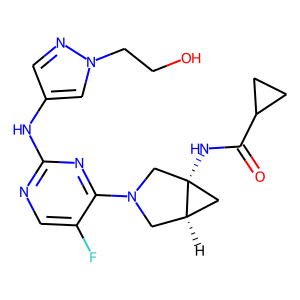

In [3]:
smi="O=C(N[C@]12C[C@H]1CN(c1nc(Nc3cnn(CCO)c3)ncc1F)C2)C1CC1"
from rdkit import Chem
from rdkit import rdBase
from rdkit.Chem.Draw import MolToImage
mol = Chem.MolFromSmiles(smi)
MolToImage(mol)

In [56]:
from rdkit import Chem
from rdkit import rdBase
from rdkit.Chem.Draw import rdMolDraw2D
wrong_smi="CC1=C2NC(=O)/C=C\C=C\[C@H](C)[C@H](O)[C@@H](C)[C@@H](O)[C@@H](C)[C@H](O)[C@H](C)[C@@H](O)[C@@H](C)/C=C(\C)C(=O)c3c(O)c(C)c(O)c(c3C1=O)C2=O"
smi="CC(C)[C@H]1C(=O)N2CCC[C@H]2C(=O)N(C)[C@H](Cc2ccccc2)C2=N[C@@H](CS2)C(=O)N[C@H](C)C2=N[C@@H](CS2)C(=O)N(C)[C@H](Cc2ccccc2)C(=O)N[C@H](C(C)C)C(=O)N[C@H](C)[C@@H](C)C(=O)O[C@@H](Cc2ccccc2)C(=O)N1C"
print(rdBase.rdkitVersion)
m = Chem.MolFromSmiles(smi)
patt = Chem.MolFromSmarts("[x3,x4]")
hit_at = m.GetSubstructMatches(patt)
print(hit_at)
hit_bonds = []
for bond in patt.GetBonds():
    aid1 = hit_at[bond.GetBeginAtomIdx()]
    aid2 = hit_at[bond.GetEndAtomIdx()]
    hit_bonds.append(m.GetBondBetweenAtoms(aid1,aid2).GetIdx())
print(hit_bonds)
hits = [int(item[0]) for item in hit_at]
d = rdMolDraw2D.MolDraw2DCairo(500,500)
rdMolDraw2D.PrepareAndDrawMolecule(d,m,highlightAtoms=hits)
d.FinishDrawing()
d.WriteDrawingText("res.png")

2020.09.1
((6,), (10,), (23,), (25,), (33,), (35,))
[]


In [58]:
from rdkit.Chem import Descriptors
m = Chem.MolFromSmiles(smi)
Descriptors.MolWt(m)

1120.4529999999995

In [43]:
patt = Chem.MolFromSmarts("[x3]")
def check_bridgedrings(mol_check,):
    hits = [item[0] for item in mol_check.GetSubstructMatches(patt)]
    hits_number = len(hits)
    for atom in hits:
        for id_atm in mol_check.GetAtomWithIdx(atom).GetNeighbors():
            if id_atm.GetIdx() in hits:
                hits_number -= 1
                break
    return hits_number > 0

wrong_smi="CC12CCC(O)CC1CCC1C2CCC2(C)[C@@H](C3=CC(=O)OC3)C(OC=O)CC12O"
smi="CC1(C)OC(=O)C=C[C@]2(C)[C@@H]3C[C@@]4(C)C(=O)[C@@]5(C)C[C@@H]6C(=O)OC[C@@]64O[C@@]3(CC[C@@H]12)C5"
wrong_mol = Chem.MolFromSmiles(wrong_smi)
true_mol = Chem.MolFromSmiles(smi)
print(check_bridgedrings(wrong_mol))
print(check_bridgedrings(true_mol))

False
True


In [33]:
hits = [int(item[0]) for item in hit_at]
num_atoms = len(hits)
for atom in hits:
    for id_atm in m.GetAtomWithIdx(atom).GetNeighbors():
        if id_atm.GetIdx() in hits:
            num_atoms -= 1
            break
print(num_atoms)
    

2
